In [ ]:
#importing the necessary libraries for plotting
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

#importing numpy and panda
import numpy as np
import pandas as pd

#librariers to build models and checking accuracy
import sklearn
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from statsmodels.formula.api import ols

#library to split data
from sklearn.model_selection import train_test_split

#library for EDA
from scipy.stats import zscore

#Library for saving data
import pickle

#library for GridSearchCV 
from sklearn.model_selection import GridSearchCV

#library for error detection in regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error

#libraries for regularisation
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('train.csv')

#show all columns in dataframe
pd.set_option('display.max_columns', None)


df.head(5)

In [ ]:
print(df.columns)

print("length of columns is ",len(df.columns))

# Data description

Observations:

1.The dataset has 81 columns

2.There is both categorical and numerical data

3.Label is SalePrice

4.The data consists of features which are:

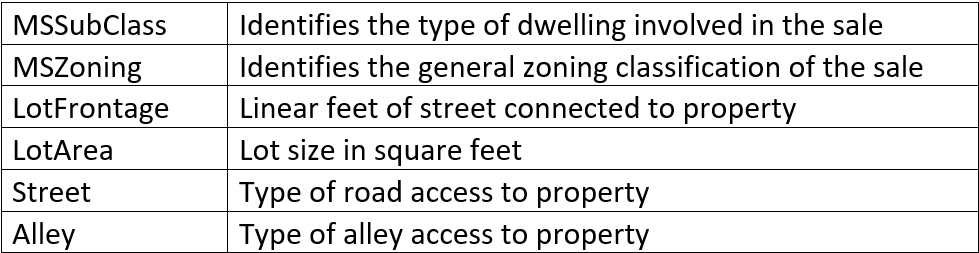

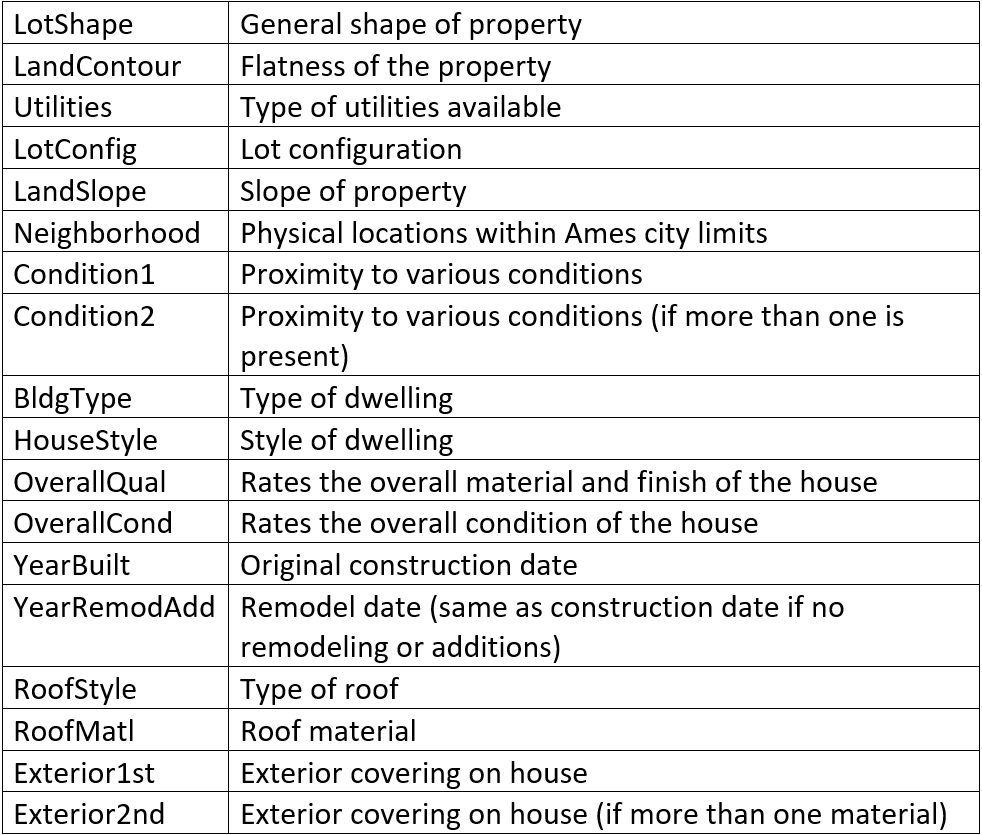

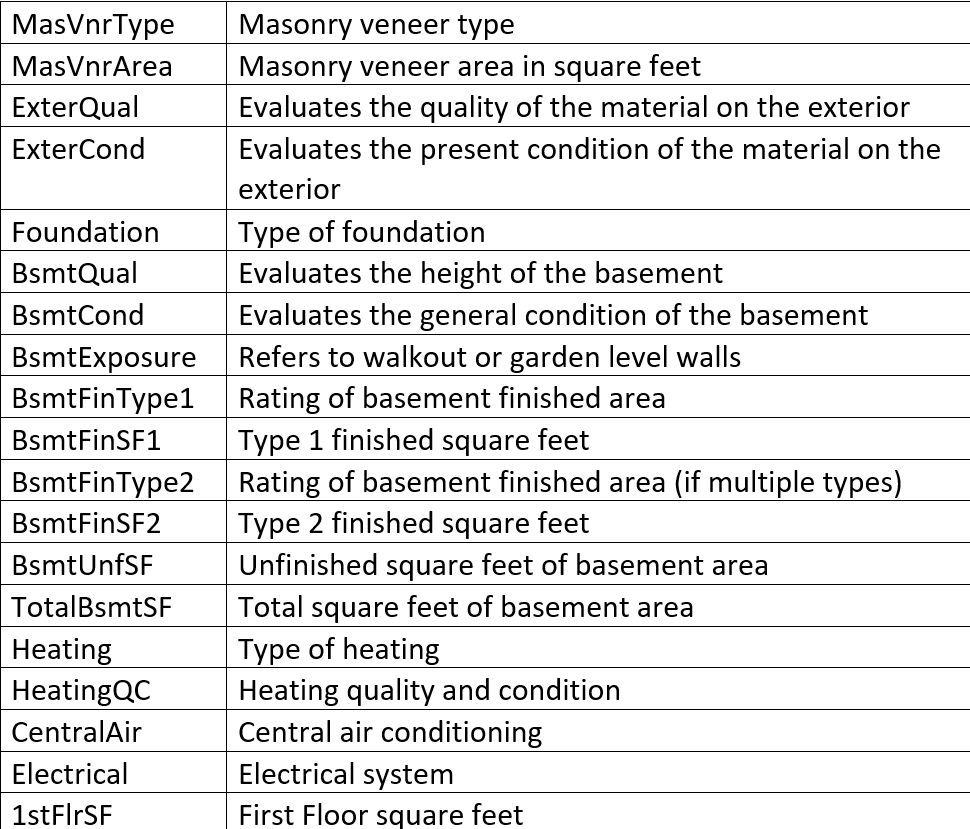

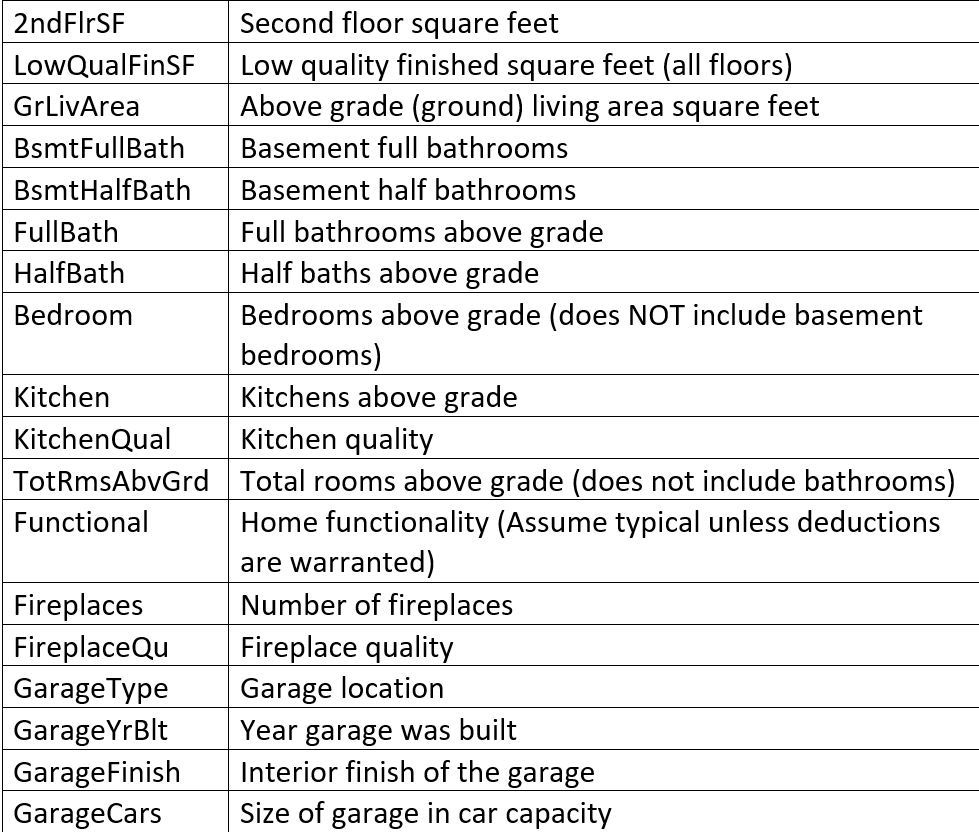

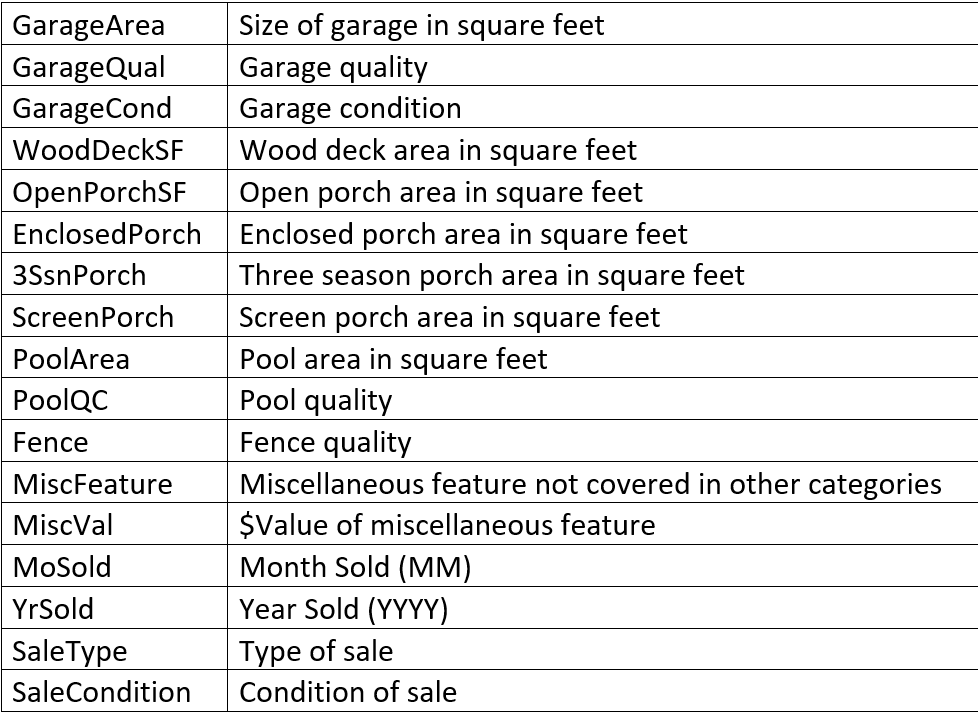

5.Numerical features are:

In [ ]:
df.select_dtypes(include=["number"]).columns

6.Categorical features are:

In [ ]:
df.select_dtypes(exclude=["number"]).columns

# Statistical analysis

In [ ]:
df.describe(include='all')

1.Null values present in: 

LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,

2.The null values are very high in columns, which can be dropped:

Alley,PoolQC,Fence,MiscFeature	

3.Outliers present in many columns 

4.Columns having 1 unique value which can be dropped:Utilities

# Feature engineering

In [ ]:
#renaming
df.rename(columns = {'MSSubClass':'type of dwelling'}, inplace = True)
df.rename(columns = {'MSZoning':'general zoning classification'}, inplace = True)
df.rename(columns = {'LotFrontage':'Linear feet of street connected to property'}, inplace = True)
df.rename(columns = {'LotArea':'Lot size in square feet'}, inplace = True)
df.rename(columns = {'Street':'Type of road access to property'}, inplace = True)
df.rename(columns = {'LotShape':'General shape of property'}, inplace = True)
df.rename(columns = {'LandContour':'Flatness of the property'}, inplace = True)
df.rename(columns = {'LotConfig':'Lot configuration'}, inplace = True)

In [ ]:
df.rename(columns = {'LandSlope':'Slope of property'}, inplace = True)
df.rename(columns = {'Neighborhood':'Physical locations within Ames city limits'}, inplace = True)
df.rename(columns = {'Condition1':'Proximity to various conditions'}, inplace = True)
df.rename(columns = {'Condition2':'Proximity to various conditions (if more than one is present)'}, inplace = True)
df.rename(columns = {'BldgType':'Type of dwelling'}, inplace = True)
df.rename(columns = {'HouseStyle':'Style of dwelling'}, inplace = True)
df.rename(columns = {'OverallQual YearRemodAdd':'Remodel date'}, inplace = True)
df.rename(columns = {'RoofStyle':'Type of roof'}, inplace = True)
df.rename(columns = {'RoofMatl':'Roof material'}, inplace = True)
df.rename(columns = {'Exterior1st':'Exterior covering on house'}, inplace = True)


In [ ]:
df.rename(columns = {'Exterior2nd':'Exterior covering on house (if more than one material)'}, inplace = True)
df.rename(columns = {'MasVnrType':'Physical locations within Ames city limits'}, inplace = True)
df.rename(columns = {'Condition1':'Proximity to various conditions'}, inplace = True)
df.rename(columns = {'Condition2':'Proximity to various conditions (if more than one is present)'}, inplace = True)
df.rename(columns = {'MasVnrType':'Masonry veneer type'}, inplace = True)
df.rename(columns = {'MasVnrArea':'Masonry veneer area in square feet'}, inplace = True)
df.rename(columns = {'ExterQual':'quality of the material on the exterior'}, inplace = True)
df.rename(columns = {'ExterCond':'present condition of the material on the exterior'}, inplace = True)
df.rename(columns = {'Foundation':'Type of foundation'}, inplace = True)
df.rename(columns = {'BsmtQual':'Evaluates the height of the basement'}, inplace = True)

In [ ]:
df.rename(columns = {'BsmtCond':'general condition of the basement'}, inplace = True)
df.rename(columns = {'BsmtExposure':'walkout or garden level walls'}, inplace = True)
df.rename(columns = {'BsmtFinType1':'Rating of basement finished area'}, inplace = True)
df.rename(columns = {'BsmtFinSF1':'Type 1 finished square feet'}, inplace = True)
df.rename(columns = {'BsmtFinType2':'Rating of basement finished area (if multiple types)'}, inplace = True)
df.rename(columns = {'BsmtFinSF2':'Type 2 finished square feet'}, inplace = True)
df.rename(columns = {'TotalBsmtSF':'Total square feet of basement area'}, inplace = True)
df.rename(columns = {'BsmtUnfSF':'Unfinished square feet of basement area'}, inplace = True)
df.rename(columns = {'Heating':'Type of heating'}, inplace = True)
df.rename(columns = {'HeatingQC':'Heating quality and condition'}, inplace = True)
df.rename(columns = {'CentralAir':'Central air conditioning'}, inplace = True)

In [ ]:
df.rename(columns = {'Electrical':'Electrical system'}, inplace = True)
df.rename(columns = {'1stFlrSF':'First Floor square feet'}, inplace = True)
df.rename(columns = {'2ndFlrSF':'Second floor square feet'}, inplace = True)
df.rename(columns = {'LowQualFinSF':'Low quality finished square feet all floors'}, inplace = True)
df.rename(columns = {'GrLivArea':'Above grade (ground) living area square feet'}, inplace = True)
df.rename(columns = {'BsmtFullBath':'Basement full bathrooms'}, inplace = True)
df.rename(columns = {'BsmtHalfBath':'Basement half bathrooms'}, inplace = True)
df.rename(columns = {'FullBath':'Full bathrooms above grade'}, inplace = True)
df.rename(columns = {'HalfBath':'Half baths above grade'}, inplace = True)
df.rename(columns = {'Bedroom':'Bedrooms above grade does NOT include basement bedrooms'}, inplace = True)

In [ ]:
df.rename(columns = {'Kitchen':'Kitchens above grade'}, inplace = True)
df.rename(columns = {'KitchenQual':'Kitchen quality'}, inplace = True)
df.rename(columns = {'TotRmsAbvGrd':'Total rooms above grade (does not include bathrooms'}, inplace = True)
df.rename(columns = {'Functional':'Home functionality '}, inplace = True)
df.rename(columns = {'Fireplaces':'Number of fireplaces'}, inplace = True)
df.rename(columns = {'FireplaceQu':'Fireplace quality'}, inplace = True)
df.rename(columns = {'GarageType':'Garage location'}, inplace = True)
df.rename(columns = {'GarageYrBlt':'Year garage was built'}, inplace = True)
df.rename(columns = {'GarageFinish':'Interior finish of the garage'}, inplace = True)
df.rename(columns = {'GarageCars':'Size of garage in car capacity'}, inplace = True)

In [ ]:
df.rename(columns = {'GarageArea':'Size of garage in square feet'}, inplace = True)
df.rename(columns = {'GarageQual':'Garage quality'}, inplace = True)
df.rename(columns = {'GarageCond':'Garage condition'}, inplace = True)
df.rename(columns = {'Functional':'Home functionality '}, inplace = True)
df.rename(columns = {'WoodDeckSF':'Wood deck area'}, inplace = True)
df.rename(columns = {'EnclosedPorch':'Enclosed porch area'}, inplace = True)
df.rename(columns = {'3SsnPorch':'Three season porch area'}, inplace = True)
df.rename(columns = {'ScreenPorch':'Screen porch area in square feet'}, inplace = True)
df.rename(columns = {'PoolArea':'Pool area in square feet'}, inplace = True)
df.rename(columns = {'PoolQC':'Pool quality'}, inplace = True)

In [ ]:
df.rename(columns = {'MiscVal':'Value of miscellaneous feature'}, inplace = True)
df.rename(columns = {'MoSold':'Month Sold'}, inplace = True)
df.rename(columns = {'YrSold':'Year Sold'}, inplace = True)
df.rename(columns = {'SaleType':'Type of sale'}, inplace = True)
df.rename(columns = {'SaleCondition':'Condition of sale'}, inplace = True)

In [ ]:
df.columns

In [ ]:
#heatmap
plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [ ]:
df.head(5)

In [ ]:
#removing column with single unique value
df.drop(["Utilities"], axis = 1, inplace = True)

In [ ]:
#removing unnecessary column
df.drop(["Id"], axis = 1, inplace = True)

In [ ]:
#Removing columsn with very high Nan values-Alley,PoolQC,Fence,MiscFeature
df.drop(["Alley"], axis = 1, inplace = True)
df.drop(["Pool quality"], axis = 1, inplace = True)
df.drop(["Fence"], axis = 1, inplace = True)
df.drop(["MiscFeature"], axis = 1, inplace = True)
df.drop(["Physical locations within Ames city limits"], axis = 1, inplace = True)

In [ ]:
df["type of dwelling"].value_counts()

In [ ]:
df["OverallQual"].value_counts()

In [ ]:
df["OverallCond"].value_counts()

In [ ]:
df["YearBuilt"].value_counts()

In [ ]:
df["YearRemodAdd"].value_counts()

In [ ]:
df["Low quality finished square feet all floors"].value_counts()

In [ ]:
df["Basement full bathrooms"].value_counts()

In [ ]:
df["Basement half bathrooms"].value_counts()

In [ ]:
df["Full bathrooms above grade"].value_counts()

In [ ]:
df["Half baths above grade"].value_counts()

In [ ]:
df["BedroomAbvGr"].value_counts()

In [ ]:
df["KitchenAbvGr"].value_counts()

In [ ]:
df["Total rooms above grade (does not include bathrooms"].value_counts()

In [ ]:
df["Number of fireplaces"].value_counts()

In [ ]:
df["Size of garage in car capacity"].value_counts()

In [ ]:
df["Enclosed porch area"].value_counts()

In [ ]:
df["Three season porch area"].value_counts()

In [ ]:
df["Screen porch area in square feet"].value_counts()

In [ ]:
df["Pool area in square feet"].value_counts()

In [ ]:
df["Value of miscellaneous feature"].value_counts()

In [ ]:
df["Month Sold"].value_counts()

In [ ]:
df["Year Sold"].value_counts()

In [ ]:
cat_cols=df.drop(["Linear feet of street connected to property","Lot size in square feet","Masonry veneer area in square feet","Type 1 finished square feet","Type 2 finished square feet","Unfinished square feet of basement area","Total square feet of basement area","First Floor square feet","Second floor square feet","Above grade (ground) living area square feet","Size of garage in square feet","Wood deck area","OpenPorchSF","SalePrice"],axis=1)

In [ ]:
cat_cols = df.select_dtypes(include=object).columns.tolist()
(pd.DataFrame(
    df[cat_cols]
    .melt(var_name='column', value_name='value')
    .value_counts())
.rename(columns={0: 'counts'})
.sort_values(by=['column', 'counts']))

# EDA

In [ ]:
#removing duplicate values
df.drop_duplicates(inplace=True)

In [ ]:
#number of columns with nan
df.isna().sum().sum()

In [ ]:
print(df["Basement full bathrooms"].isna().sum())
print(df["Basement half bathrooms"].isna().sum())
print(df["Full bathrooms above grade"].isna().sum())
print(df["Half baths above grade"].isna().sum())

print(df["BedroomAbvGr"].isna().sum())
print(df["KitchenAbvGr"].isna().sum())
print(df["Number of fireplaces"].isna().sum())
print(df["Low quality finished square feet all floors"].isna().sum())


In [ ]:
# replacing all 0 with Nan

#finding columns having 0
zero_columns=pd.DataFrame(df.columns[df.isin([0]).any()])
pd.set_option('display.max_rows', None)
print(zero_columns)
print(zero_columns.info())

In [ ]:
#finding percentage of 0 values present
df.loc[:,list(df.loc[:,df.isin([0]).any()].columns)].isin([0]).sum()/(len(df))*100

In [ ]:
#finding percentage of 0 values present
df.loc[:,list(df.loc[:,df.isin([0]).any()].columns)].isin([0]).sum()/(len(df))*100

In [ ]:
#removing columns with above 70% 0 values
df = df.drop(df.columns[df.apply(lambda col: col.isin([0]).sum()/len(df) > 0.70)], axis=1)

In [ ]:
#finding percentage of 0 values present
df.loc[:,list(df.loc[:,df.isin([0]).any()].columns)].isin([0]).sum()/(len(df))*100

In [ ]:
#Replacing 0 with mean of the column
df["Masonry veneer area in square feet"]=df["Masonry veneer area in square feet"].replace(0.0,df["Masonry veneer area in square feet"].mean())
df["Masonry veneer area in square feet"].value_counts()

In [ ]:
#Replacing 0 with mean of the column
df["Type 1 finished square feet"]=df["Type 1 finished square feet"].replace(0,df["Masonry veneer area in square feet"].mean())
df["Type 1 finished square feet"].value_counts()

In [ ]:
#Replacing 0 with mean of the column
df["Unfinished square feet of basement area"]=df["Unfinished square feet of basement area"].replace(0,df["Unfinished square feet of basement area"].mean())
df["Unfinished square feet of basement area"].value_counts()

In [ ]:
df["Total square feet of basement area"]=df["Total square feet of basement area"].replace(0,df["Total square feet of basement area"].mean())
df["Total square feet of basement area"].value_counts()

In [ ]:
df["Second floor square feet"]=df["Second floor square feet"].replace(0,df["Second floor square feet"].mean())
df["Second floor square feet"].value_counts()

In [ ]:
#replacing with mode
df["Basement full bathrooms"]=df["Basement full bathrooms"].replace(0,df["Basement full bathrooms"].mode()[0])
df["Basement full bathrooms"].value_counts()

In [ ]:
#Full bathrooms above grade
df["Full bathrooms above grade"].value_counts()

In [ ]:
#Half baths above grade
df["Half baths above grade"]=df["Half baths above grade"].replace(0,df["Half baths above grade"].mode()[0])
df["Half baths above grade"].value_counts()

In [ ]:
#Bedrooms above grade (does NOT include basement bedrooms)
df["BedroomAbvGr"]=df["BedroomAbvGr"].replace(0,df["BedroomAbvGr"].mode()[0])
df["BedroomAbvGr"].value_counts()

In [ ]:
#Kitchens above gradedf["KitchenAbvGr"]=df["KitchenAbvGr"].replace(0,df["KitchenAbvGr"].mode()[0])
df["KitchenAbvGr"].value_counts()

In [ ]:
df["Number of fireplaces"]=df["Number of fireplaces"].replace(0,df["Number of fireplaces"].mode()[0])
df["Number of fireplaces"].value_counts()

In [ ]:
df["Size of garage in car capacity"]=df["Size of garage in car capacity"].replace(0,df["Size of garage in car capacity"].mean())
df["Size of garage in car capacity"].value_counts()

In [ ]:
df["Size of garage in square feet"]=df["Size of garage in square feet"].replace(0,df["Size of garage in square feet"].mean())
df["Size of garage in square feet"].value_counts()

In [ ]:
df["Wood deck area"]=df["Wood deck area"].replace(0,df["Wood deck area"].mean())
df["Wood deck area"].value_counts()

In [ ]:
df["OpenPorchSF"]=df["OpenPorchSF"].replace(0,df["OpenPorchSF"].mean())
df["OpenPorchSF"].value_counts()

In [ ]:
#number of columns with nan
df.isna().sum().sum()

In [ ]:
#checking nan
null=pd.DataFrame(data=df.isnull().sum())
pd.set_option('display.max_rows', None)
null.head(75)

In [ ]:
#columns that have null
df.loc[:, df.isnull().any()].columns

In [ ]:
#percentage of null 
df.loc[:,list(df.loc[:,df.isnull().any()].columns)].isnull().sum()/(len(df))*100

In [ ]:
#dropping columns which have above 70% null values
df = df.drop(df.columns[df.apply(lambda col: col.isnull().sum()/len(df) > 0.70)], axis=1)
df.loc[:,list(df.loc[:,df.isnull().any()].columns)].isnull().sum()/(len(df))*100

In [ ]:
df["Linear feet of street connected to property"]=df["Linear feet of street connected to property"].fillna(df["Linear feet of street connected to property"].mode()[0])
df["Masonry veneer area in square feetts"]=df["Masonry veneer area in square feet"].fillna(df["Masonry veneer area in square feet"].mean())
df["Evaluates the height of the basement"]=df["Evaluates the height of the basement"].fillna(df["Evaluates the height of the basement"].mode()[0])
df["Type 1 finished square feet"]=df["Type 1 finished square feet"].fillna(df["Type 1 finished square feet"].mean())
df["Unfinished square feet of basement area"]=df["Unfinished square feet of basement area"].fillna(df["Unfinished square feet of basement area"].mean())
df["Total square feet of basement area"]=df["Total square feet of basement area"].fillna(df["Total square feet of basement area"].mean())
df["Second floor square feet"]=df["Second floor square feet"].fillna(df["Second floor square feet"].mean())
df["Size of garage in square feet"]=df["Size of garage in square feet"].fillna(df["Size of garage in square feet"].mean())
df["Wood deck area"]=df["Wood deck area"].fillna(df["Wood deck area"].mode()[0])
df["OpenPorchSF"]=df["OpenPorchSF"].fillna(df["OpenPorchSF"].mode()[0])
df["Masonry veneer area in square feet"]=df["Masonry veneer area in square feet"].fillna(df["Masonry veneer area in square feet"].mode()[0])
df["Evaluates the height of the basement"]=df["Evaluates the height of the basement"].fillna(df["Evaluates the height of the basement"].mode()[0])
df["general condition of the basement"]=df["general condition of the basement"].fillna(df["general condition of the basement"].mode()[0])
df["walkout or garden level walls"]=df["walkout or garden level walls"].fillna(df["walkout or garden level walls"].mode()[0])
df["Rating of basement finished area"]=df["Rating of basement finished area"].fillna(df["Rating of basement finished area"].mode()[0])
df["Rating of basement finished area (if multiple types)"]=df["Rating of basement finished area (if multiple types)"].fillna(df["Rating of basement finished area (if multiple types)"].mode()[0])
df["Fireplace quality"]=df["Fireplace quality"].fillna(df["Fireplace quality"].mode()[0])
df["Garage location"]=df["Garage location"].fillna(df["Garage location"].mode()[0])
df["Year garage was built"]=df["Year garage was built"].fillna(df["Year garage was built"].mode()[0])
df["Interior finish of the garage"]=df["Interior finish of the garage"].fillna(df["Interior finish of the garage"].mode()[0])
df["Garage quality"]=df["Garage quality"].fillna(df["Garage quality"].mode()[0])
df["Garage condition"]=df["Garage condition"].fillna(df["Garage condition"].mode()[0])

In [ ]:
#number of columns with nan
df.isna().sum().sum()

In [ ]:
#checking if column has null value left
df.loc[:, df.isnull().any()].columns

All 0 and Null values are removed

In [ ]:
#finding numerical datas
df.select_dtypes(include=["number"]).columns

In [ ]:
#finding outliers
num=df[{'type of dwelling', 'Linear feet of street connected to property',
       'Lot size in square feet', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'Masonry veneer area in square feet',
       'Type 1 finished square feet',
       'Unfinished square feet of basement area',
       'Total square feet of basement area', 'First Floor square feet',
       'Second floor square feet',
       'Above grade (ground) living area square feet',
       'Basement full bathrooms', 'Full bathrooms above grade',
       'Half baths above grade', 'BedroomAbvGr', 'KitchenAbvGr',
       'Total rooms above grade (does not include bathrooms',
       'Number of fireplaces', 'Year garage was built',
       'Size of garage in car capacity', 'Size of garage in square feet',
       'Wood deck area', 'OpenPorchSF', 'Month Sold', 'Year Sold', 'SalePrice',
       'Masonry veneer area in square feetts'}]

#checking for outliers
plt.figure(figsize=(15,50))
graph=1

for column in num:
    if graph<=30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(num[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
    
plt.show()

In [ ]:
#removing outliers
#Using zscore
import numpy as np
from scipy.stats import zscore

z=np.abs(zscore(num))
threshold=3
df_new=df[(z<3).all(axis=1)]

print("rows before applying zscore: ",len(df))
print("rows after applying zscore: ",len(df_new))

In [ ]:
num=df_new[{'type of dwelling', 'Linear feet of street connected to property',
       'Lot size in square feet', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'Masonry veneer area in square feet',
       'Type 1 finished square feet',
       'Unfinished square feet of basement area',
       'Total square feet of basement area', 'First Floor square feet',
       'Second floor square feet',
       'Above grade (ground) living area square feet',
       'Basement full bathrooms', 'Full bathrooms above grade',
       'Half baths above grade', 'BedroomAbvGr', 'KitchenAbvGr',
       'Total rooms above grade (does not include bathrooms',
       'Number of fireplaces', 'Year garage was built',
       'Size of garage in car capacity', 'Size of garage in square feet',
       'Wood deck area', 'OpenPorchSF', 'Month Sold', 'Year Sold', 'SalePrice',
       'Masonry veneer area in square feetts'}]


#checking for outliers
plt.figure(figsize=(15,50))
graph=1

for column in num:
    if graph<=30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(num[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
    
plt.show()

Data is cleaned

In [ ]:
df=df_new

In [ ]:
df.skew()

Skewness is low

# Graphical data analysis

In [ ]:
#understanding the relationship between independent variable with label
data_corr=df.corr()
data_corr["SalePrice"].sort_values(ascending=False)

In [ ]:
df.groupby('type of dwelling').size().plot(kind='pie', autopct='%.2f')
plt.title("type of dwelling",bbox={'facecolor':'0.8', 'pad':5})

plt.figure(figsize=(7,4))
sns.lineplot(x="type of dwelling",y="SalePrice",data=df)
plt.show()

x =df["type of dwelling"] 
y = df["SalePrice"]


plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('type of dwelling')
plt.ylabel('SalePrice')
plt.show()


        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

1.The 1-STORY 1946 & NEWER ALL STYLES is highest among the types of dwellings

2.The Sale price is highest in 2-STORY 1946 & NEWER 

In [ ]:
x =df["general zoning classification"] 
y =df["SalePrice"]


plt.figure(figsize=(7,4))
sns.lineplot(x="general zoning classification",y="SalePrice",data=df)
plt.show()

plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('general zoning classification')
plt.ylabel('SalePrice')
plt.show()

df.groupby('general zoning classification').size().plot(kind='pie', autopct='%.2f')
plt.title("general zoning classification",bbox={'facecolor':'0.8', 'pad':5})

A	Agriculture

C	Commercial

FV	Floating Village Residential

I	Industrial

RH	Residential High Density

RL	Residential Low Density

RP	Residential Low Density Park

RM	Residential Medium Density
	

1.Residential Low density is highest among the general zone classification

2.Residential Low Density and Residential Medium Density gives highest sale price

In [ ]:
x =df["Linear feet of street connected to property"] 
y =df["SalePrice"]

plt.bar(x, y, color ='blue',width = 0.4)
plt.xlabel("Type of road access to property")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Type of road access to property')
plt.ylabel('SalePrice')
plt.show()

x.hist()

1.When the street is between 40 to 110, it gives sales price of upto 3lakh

2.But when between 60 to 90, it gives above 30lakh and upto 40lakh sales price


In [ ]:
x =df["Lot size in square feet"] 
y =df["SalePrice"]

x.hist()

plt.figure(figsize=(7,4))
sns.lineplot(x="Lot size in square feet",y="SalePrice",data=df)
plt.show()

plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Lot size in square feet')
plt.ylabel('SalePrice')
plt.show()



1.More than 300 customers have bought houses with land area of around 10,000 square feet

2.Sale prices are highest between 10,000sq feet and 13,000 sq feet and starts to decrease after it

In [ ]:
x =df["Type of road access to property"] 
y =df["SalePrice"]

plt.bar(x, y, color ='blue',width = 0.4)
plt.xlabel("Type of road access to property")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Type of road access to property')
plt.ylabel('SalePrice')
plt.show()

df.groupby('Type of road access to property').size().plot(kind='pie', autopct='%.2f')
plt.title("Type of road access to property",bbox={'facecolor':'0.8', 'pad':5})

Paved road access is highest among the type of road acess to property and it shows highest sale price

In [ ]:
x =df["General shape of property"] 
y =df["SalePrice"]

plt.bar(x, y, color ='blue',width = 0.4)
plt.xlabel("General shape of property")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('General shape of property')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(7,4))
sns.lineplot(x="General shape of property",y="SalePrice",data=df)
plt.show()


df.groupby('General shape of property').size().plot(kind='pie', autopct='%.2f')
plt.title("General shape of property",bbox={'facecolor':'0.8', 'pad':5})

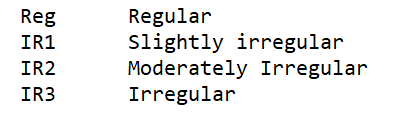

1.Maximum houses have regular shape

2.But the houses with slightly irregular shape shows the highest sales price

In [ ]:
#Flatness of the property

x =df["Flatness of the property"] 
y =df["SalePrice"]

plt.bar(x, y, color ='pink',width = 0.4)
plt.xlabel("Flatness of the property")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Flatness of the property')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(7,4))
sns.lineplot(x="Flatness of the property",y="SalePrice",data=df,color ='pink')
plt.show()

df.groupby('Flatness of the property').size().plot(kind='pie', autopct='%.2f')
plt.title("Flatness of the property",bbox={'facecolor':'0.8', 'pad':5})

Lvl	   -Near Flat/Level	

Bnk	Banked - Quick and significant rise from street grade to building

HLS	Hillside - Significant slope from side to side

Low	Depression

1.Most of the property was levelled

2.Property which were hillside with significant slope from side to side had highest sale price

In [ ]:

x =df["Lot configuration"] 
y =df["SalePrice"]

plt.bar(x, y, color ='green',width = 0.4)
plt.xlabel("Lot configuration")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Lot configuration')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(7,4))
sns.lineplot(x="Lot configuration",y="SalePrice",data=df,color ='green')
plt.show()

df.groupby('Lot configuration').size().plot(kind='pie', autopct='%.2f')
plt.title("Lot configuration",bbox={'facecolor':'0.8', 'pad':5})

Inside-Inside lot

Corner-Corner lot

CulDSac-Cul-de-sac

FR2	Frontage on 2 sides of property

FR3	Frontage on 3 sides of property

1.Highest is Inside lot

2.Sale price is highest for Cul de sac

In [ ]:
x =df["Slope of property"] 
y =df["SalePrice"]

plt.bar(x, y, color ='yellow',width = 0.4)
plt.xlabel("Slope of property")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Slope of property')
plt.ylabel('SalePrice')
plt.show()


plt.figure(figsize=(7,4))
sns.lineplot(x="Slope of property",y="SalePrice",data=df,color ='yellow')
plt.show()


df.groupby('Slope of property').size().plot(kind='pie', autopct='%.2f')
plt.title("Slope of property",bbox={'facecolor':'0.8', 'pad':5})

Gtl	Gentle slope

Mod	Moderate Slope	

Sev	Severe Slope

The highets number of properties have gentler slope and show higher sales price

In [ ]:
x =df["Proximity to various conditions"] 
y =df["SalePrice"]

plt.bar(x, y, color ='blue',width = 0.4)
plt.xlabel("Proximity to various conditions")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Proximity to various conditions')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(7,4))
sns.lineplot(x="Proximity to various conditions",y="SalePrice",data=df)
plt.show()

df.groupby('Proximity to various conditions').size().plot(kind='pie', autopct='%.2f')
plt.title("Proximity to various conditions",bbox={'facecolor':'0.8', 'pad':5})

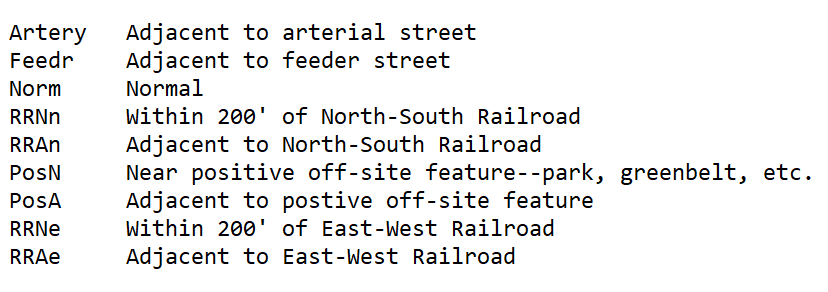

Maximum number of houses are normal and they show highest sale price

In [ ]:
x =df["Proximity to various conditions (if more than one is present)"] 
y =df["SalePrice"]

plt.bar(x, y, color ='grey',width = 0.4)
plt.xlabel("Proximity to various conditions (if more than one is present)")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Proximity to various conditions (if more than one is present)')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(7,4))
sns.lineplot(x="Proximity to various conditions (if more than one is present)",y="SalePrice",data=df)
plt.show()

df.groupby('Proximity to various conditions (if more than one is present)').size().plot(kind='pie', autopct='%.2f')
plt.title("Proximity to various conditions (if more than one is present)",bbox={'facecolor':'0.8', 'pad':5})

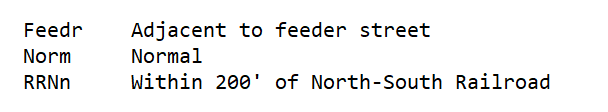

Maximum number of houses are normal and they show highest sale price

In [ ]:
x =df["Type of dwelling"] 
y =df["SalePrice"]

plt.bar(x, y, color ='grey',width = 0.4)
plt.xlabel("Type of dwelling")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Type of dwelling')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(7,4))
sns.lineplot(x="Type of dwelling",y="SalePrice",data=df,color ='grey')
plt.show()


df.groupby('Type of dwelling').size().plot(kind='pie', autopct='%.2f')
plt.title("Type of dwelling",bbox={'facecolor':'0.8', 'pad':5})

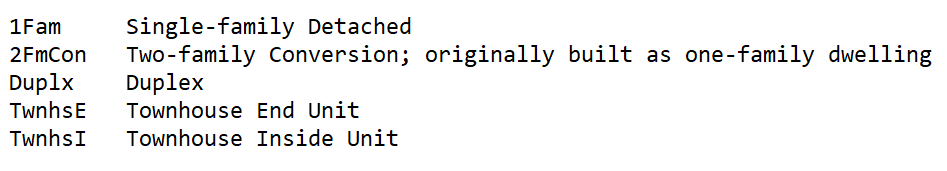

1.Maximum houses are single family detached

2.Maximum sale price is for Townhouse End Unit

In [ ]:
x =df["Style of dwelling"] 
y =df["SalePrice"]

plt.bar(x, y, color ='purple',width = 0.4)
plt.xlabel("Style of dwelling")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Style of dwelling')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(7,4))
sns.lineplot(x="Style of dwelling",y="SalePrice",data=df)
plt.show()

df.groupby('Style of dwelling').size().plot(kind='pie', autopct='%.2f')
plt.title("Style of dwelling",bbox={'facecolor':'0.8', 'pad':5})

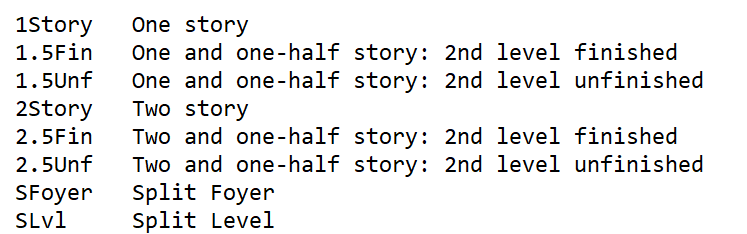

Maximum houses are 1 story but sale price of 2 storey is highest

In [ ]:
x =df["OverallQual"] 
y =df["SalePrice"]

plt.bar(x, y, color ='blue',width = 0.4)
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()


plt.figure(figsize=(7,4))
sns.lineplot(x="OverallQual",y="SalePrice",data=df)
plt.show()


df.groupby('OverallQual').size().plot(kind='pie', autopct='%.2f')
plt.title("OverallQual",bbox={'facecolor':'0.8', 'pad':5})

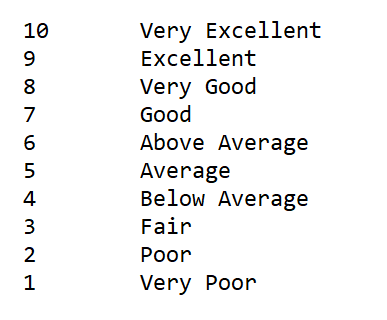

Maximum houses are above average

With increase in quality the price of the house increases

In [ ]:
x =df["OverallCond"] 
y =df["SalePrice"]

plt.bar(x, y, color ='pink',width = 0.4)
plt.xlabel("OverallCond")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('OverallCond')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(7,4))
sns.lineplot(x="OverallCond",y="SalePrice",data=df)
plt.show()


df.groupby('OverallCond').size().plot(kind='pie', autopct='%.2f')
plt.title("OverallCond",bbox={'facecolor':'0.8', 'pad':5})

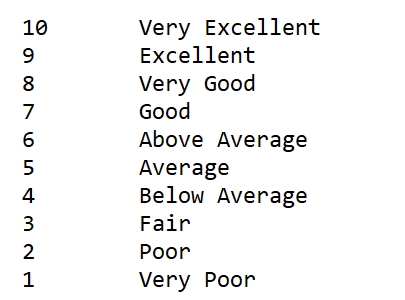

Most of the houses are average conditions.

The prices increase upto average, then the price starts dropping towards very excellent

In [ ]:
df["YearBuilt"].hist()

In [ ]:
x =df["YearBuilt"] 
y =df["SalePrice"]

plt.bar(x, y, color ='blue',width = 0.4)
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.show()


plt.figure(figsize=(7,4))
sns.lineplot(x="YearBuilt",y="SalePrice",data=df)
plt.show()

plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.show()



Sale price increases when the house is more New

In [ ]:
df["YearRemodAdd"].hist()

In [ ]:
x =df["YearRemodAdd"] 
y =df["SalePrice"]

plt.bar(x, y, color ='maroon',width = 0.4)
plt.xlabel("YearRemodAdd")
plt.ylabel("SalePrice")
plt.show()

plt.figure(figsize=(7,4))
sns.lineplot(x="YearRemodAdd",y="SalePrice",data=df)
plt.show()


plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('YearRemodAdd')
plt.ylabel('SalePrice')
plt.show()

df.groupby('YearRemodAdd').size().plot(kind='pie', autopct='%.2f')
plt.title("YearRemodAdd",bbox={'facecolor':'0.8', 'pad':5})

The sooner the remodelling was done, the higher the prices

In [ ]:
x =df["Type of roof"] 
y =df["SalePrice"]

plt.bar(x, y, color ='blue',width = 0.4)
plt.xlabel("Type of roof")
plt.ylabel("SalePrice")
plt.show()


plt.figure(figsize=(7,4))
sns.lineplot(x="Type of roof",y="SalePrice",data=df)
plt.show()


plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Type of roof')
plt.ylabel('SalePrice')
plt.show()

df.groupby('Type of roof').size().plot(kind='pie', autopct='%.2f')
plt.title("Type of roof",bbox={'facecolor':'0.8', 'pad':5})

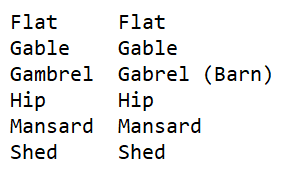

Maximum roofs are gable and hip, and they have given the highest sale price

In [ ]:
x =df["Roof material"] 
y =df["SalePrice"]

plt.bar(x, y, color ='green',width = 0.4)
plt.xlabel("Roof material")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Roof material')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(7,4))
sns.lineplot(x="Roof material",y="SalePrice",data=df)
plt.show()

df.groupby('Roof material').size().plot(kind='pie', autopct='%.2f')
plt.title("Roof material",bbox={'facecolor':'0.8', 'pad':5})

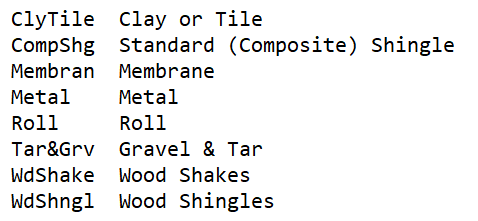

Maximum roofs are made of Standard Composite Shinglea 

Both standard composite shingle and Wood shakes show high price

In [ ]:
x =df["Exterior covering on house"] 
y =df["SalePrice"]

plt.bar(x, y, color ='red',width = 2)
plt.xlabel("Exterior covering on house")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(15,8), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Exterior covering on house')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(10,4))
sns.lineplot(x="Exterior covering on house",y="SalePrice",data=df)
plt.show()

df.groupby('Exterior covering on house').size().plot(kind='pie', autopct='%.2f')
plt.title("Exterior covering on house",bbox={'facecolor':'0.8', 'pad':5})

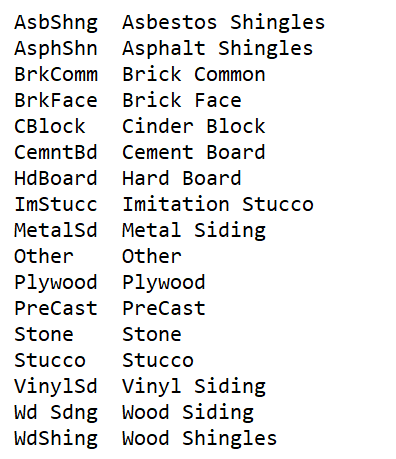

Vinyl siding has highest sales price

In [ ]:
x =df["Exterior covering on house (if more than one material)"] 
y =df["SalePrice"]

plt.bar(x, y, color ='yellow',width = 1)
plt.xlabel("Exterior covering on house (if more than one material)")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(15,8), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Exterior covering on house (if more than one material)')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(15,7))
sns.lineplot(x="Exterior covering on house (if more than one material)",y="SalePrice",data=df)
plt.show()

df.groupby('Exterior covering on house (if more than one material)').size().plot(kind='pie', autopct='%.2f')
plt.title("Exterior covering on house (if more than one material)",bbox={'facecolor':'0.8', 'pad':5})

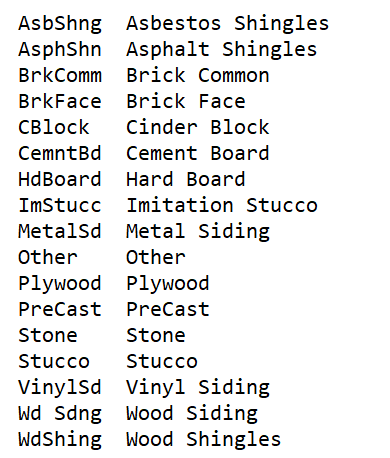

Largest number of houses have Vinyl but the highest price is for Cement board

In [ ]:
x =df["quality of the material on the exterior"] 
y =df["SalePrice"]

plt.bar(x, y, color ='green',width = 0.3)
plt.xlabel("quality of the material on the exterior")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(7,4), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('quality of the material on the exterior')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(10,4))
sns.lineplot(x="quality of the material on the exterior",y="SalePrice",data=df)
plt.show()

df.groupby('quality of the material on the exterior').size().plot(kind='pie', autopct='%.2f')
plt.title("quality of the material on the exterior",bbox={'facecolor':'0.8', 'pad':5})

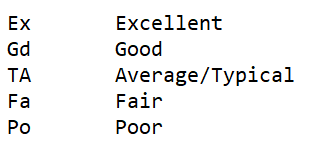

Maximum number of houses are average, but maximum sale price is for Excellent houses

In [ ]:
x =df["present condition of the material on the exterior"] 
y =df["SalePrice"]

plt.bar(x, y, color ='pink',width = 1)
plt.xlabel("present condition of the material on the exterior")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(8,4), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('present condition of the material on the exterior')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(10,4))
sns.lineplot(x="present condition of the material on the exterior",y="SalePrice",data=df)
plt.show()

df.groupby('present condition of the material on the exterior').size().plot(kind='pie', autopct='%.2f')
plt.title("present condition of the material on the exterior",bbox={'facecolor':'0.8', 'pad':5})

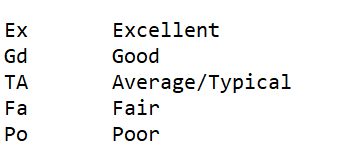

Maximum houses are having average rating for the condition of the exterior materials, but maximum price is obtained for good ratings of the exterior materials condition

In [ ]:
x =df["Type of foundation"] 
y =df["SalePrice"]

plt.bar(x, y, color ='orange',width = 0.4)
plt.xlabel("Type of foundation")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Type of foundation')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(10,4))
sns.lineplot(x="Type of foundation",y="SalePrice",data=df)
plt.show()

df.groupby('Type of foundation').size().plot(kind='pie', autopct='%.2f')
plt.title("Type of foundation",bbox={'facecolor':'0.8', 'pad':5})

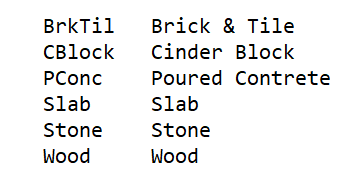

1.Maximum foundations are of cinder block and poured concrete

2.Maximum sale price is for poured concrete

In [ ]:
x =df["walkout or garden level walls"] 
y =df["SalePrice"]

plt.bar(x, y, color ='black',width = 0.4)
plt.xlabel("walkout or garden level walls")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('walkout or garden level walls')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(10,4))
sns.lineplot(x="walkout or garden level walls",y="SalePrice",data=df)
plt.show()

df.groupby('walkout or garden level walls').size().plot(kind='pie', autopct='%.2f')
plt.title("walkout or garden level walls",bbox={'facecolor':'0.8', 'pad':5})

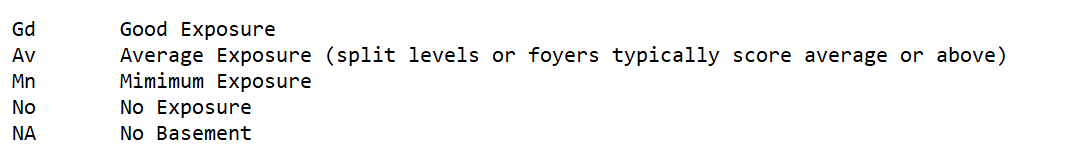

Maximum houses have no exposure to walkouts or gardens, but maximum sale price is for good exposure to it

In [ ]:
x =df["Rating of basement finished area"] 
y =df["SalePrice"]

plt.bar(x, y, color ='black',width = 0.4)
plt.xlabel("Rating of basement finished area")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Rating of basement finished area')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(10,4))
sns.lineplot(x="Rating of basement finished area",y="SalePrice",data=df)
plt.show()

df.groupby('Rating of basement finished area').size().plot(kind='pie', autopct='%.2f')
plt.title("Rating of basement finished area",bbox={'facecolor':'0.8', 'pad':5})

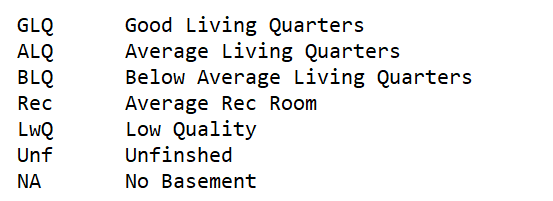

Maximum number of houses have basements unfinished, but the maximum sale price is for the houses which are good living quaters

In [ ]:
#Rating of basement finished area (if multiple types)

x =df["Rating of basement finished area (if multiple types)"] 
y =df["SalePrice"]

plt.bar(x, y, color ='black',width = 0.4)
plt.xlabel("Rating of basement finished area (if multiple types)")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Rating of basement finished area (if multiple types)')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(10,4))
sns.lineplot(x="Rating of basement finished area (if multiple types)",y="SalePrice",data=df)
plt.show()

df.groupby('Rating of basement finished area (if multiple types)').size().plot(kind='pie', autopct='%.2f')
plt.title("Rating of basement finished area (if multiple types)",bbox={'facecolor':'0.8', 'pad':5})

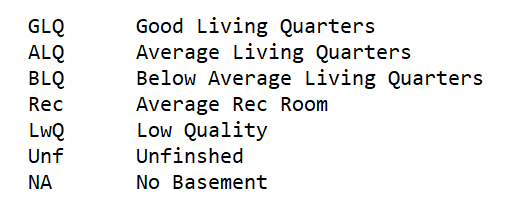

1.Maximum houses have their basements unfinished

2.Sale price is maximum for good living quaters and average living quaters

In [ ]:
df["OpenPorchSF"].hist()

In [ ]:
#Analysing the relationship between numerical features and SalePrice



#visualising the relationship- scatter plot 
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in num:
    if plotnumber<=30:
        X=plt.subplot(10,3,plotnumber)
        plt.scatter(num[column],df['SalePrice'])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Sale Price',fontsize=20)
    plotnumber+=1
plt.tight_layout()

1.Masonry veneer area in square feet, maximum sale price is between 100 to 400 square feet

2.Type 1 finished square feet increases, the sale price increases

3.Unfinished square feet of basement area, the sale prices decreases as it increases

4.Total square feet of basement area,the sale price increases as it increases

5.First Floor square feet,As it increases, the sale price increases

6.Second floor square feet,the sale price increases as it increases

7.Above grade (ground) living area square feet,the sale price increases as it increases

8.Size of garage in square feet,the sale price increases as it increases

9.Wood deck area,doesnt have much impact on sale price and maximum houses have 100 to 250 wood deck area

10.Open porch area in square feet doesnt have much impact on sale price

# Equipments

In [ ]:
x =df["Type of heating"] 
y =df["SalePrice"]

plt.bar(x, y, color ='black',width = 0.4)
plt.xlabel("Type of heating")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Type of heating')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(10,4))
sns.lineplot(x="Type of heating",y="SalePrice",data=df)
plt.show()

df.groupby('Type of heating').size().plot(kind='pie', autopct='%.2f')
plt.title("Type of heating",bbox={'facecolor':'0.8', 'pad':5})

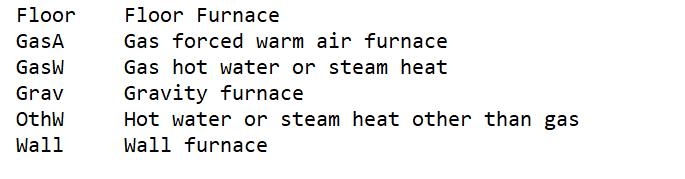

In [ ]:
x =df["Heating quality and condition"] 
y =df["SalePrice"]

plt.bar(x, y, color ='black',width = 0.4)
plt.xlabel("Heating quality and condition")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Heating quality and condition')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(10,4))
sns.lineplot(x="Heating quality and condition",y="SalePrice",data=df)
plt.show()

df.groupby('Heating quality and condition').size().plot(kind='pie', autopct='%.2f')
plt.title("Heating quality and condition",bbox={'facecolor':'0.8', 'pad':5})

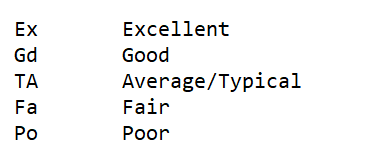

In [ ]:
x =df["Central air conditioning"] 
y =df["SalePrice"]

plt.bar(x, y, color ='black',width = 0.4)
plt.xlabel("Central air conditioning")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Central air conditioning')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(10,4))
sns.lineplot(x="Central air conditioning",y="SalePrice",data=df)
plt.show()

df.groupby('Central air conditioning').size().plot(kind='pie', autopct='%.2f')
plt.title("Central air conditioning",bbox={'facecolor':'0.8', 'pad':5})

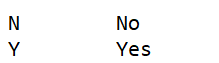

In [ ]:
x =df["Electrical system"] 
y =df["SalePrice"]

plt.bar(x, y, color ='black',width = 0.4)
plt.xlabel("Electrical system")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Electrical system')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(10,4))
sns.lineplot(x="Electrical system",y="SalePrice",data=df)
plt.show()

df.groupby('Electrical system').size().plot(kind='pie', autopct='%.2f')
plt.title("Electrical system",bbox={'facecolor':'0.8', 'pad':5})

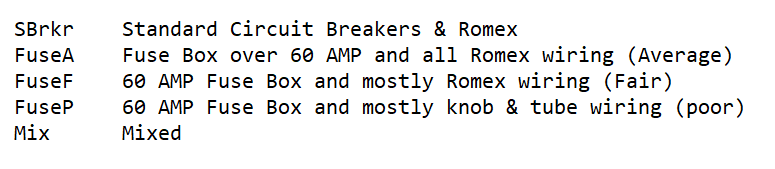

# Rooms

In [ ]:
x =df["Basement full bathrooms"] 
y =df["SalePrice"]

plt.bar(x, y, color ='black',width = 0.4)
plt.xlabel("Basement full bathrooms")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Basement full bathrooms')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(10,4))
sns.lineplot(x="Basement full bathrooms",y="SalePrice",data=df)
plt.show()

df.groupby('Basement full bathrooms').size().plot(kind='pie', autopct='%.2f')
plt.title("Basement full bathrooms",bbox={'facecolor':'0.8', 'pad':5})

In [ ]:
x =df["Full bathrooms above grade"] 
y =df["SalePrice"]

plt.bar(x, y, color ='black',width = 0.4)
plt.xlabel("Full bathrooms above grade")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Full bathrooms above grade')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(10,4))
sns.lineplot(x="Full bathrooms above grade",y="SalePrice",data=df)
plt.show()

df.groupby('Full bathrooms above grade').size().plot(kind='pie', autopct='%.2f')
plt.title("Full bathrooms above grade",bbox={'facecolor':'0.8', 'pad':5})

In [ ]:
x =df["Half baths above grade"] 
y =df["SalePrice"]

plt.bar(x, y, color ='black',width = 0.4)
plt.xlabel("Half baths above grade")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Half baths above grade')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(10,4))
sns.lineplot(x="Half baths above grade",y="SalePrice",data=df)
plt.show()

df.groupby('Half baths above grade').size().plot(kind='pie', autopct='%.2f')
plt.title("Half baths above grade",bbox={'facecolor':'0.8', 'pad':5})

In [ ]:
x =df["BedroomAbvGr"] 
y =df["SalePrice"]

plt.bar(x, y, color ='black',width = 0.4)
plt.xlabel("BedroomAbvGr")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('BedroomAbvGr')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(10,4))
sns.lineplot(x="BedroomAbvGr",y="SalePrice",data=df)
plt.show()

df.groupby('BedroomAbvGr').size().plot(kind='pie', autopct='%.2f')
plt.title("BedroomAbvGr",bbox={'facecolor':'0.8', 'pad':5})

In [ ]:
x =df["KitchenAbvGr"] 
y =df["SalePrice"]

plt.bar(x, y, color ='black',width = 0.4)
plt.xlabel("KitchenAbvGr")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('KitchenAbvGr')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(10,4))
sns.lineplot(x="KitchenAbvGr",y="SalePrice",data=df)
plt.show()

df.groupby('KitchenAbvGr').size().plot(kind='pie', autopct='%.2f')
plt.title("KitchenAbvGr",bbox={'facecolor':'0.8', 'pad':5})

In [ ]:
x =df["Kitchen quality"] 
y =df["SalePrice"]

plt.bar(x, y, color ='black',width = 0.4)
plt.xlabel("Kitchen quality")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Kitchen quality')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(10,4))
sns.lineplot(x="Kitchen quality",y="SalePrice",data=df)
plt.show()

df.groupby('Kitchen quality').size().plot(kind='pie', autopct='%.2f')
plt.title("KitchenAbvGr",bbox={'facecolor':'0.8', 'pad':5})

In [ ]:
x =df["Home functionality "] 
y =df["SalePrice"]

plt.bar(x, y, color ='black',width = 0.4)
plt.xlabel("Home functionality ")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Home functionality ')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(10,4))
sns.lineplot(x="Home functionality ",y="SalePrice",data=df)
plt.show()

df.groupby('Home functionality ').size().plot(kind='pie', autopct='%.2f')
plt.title("Home functionality ",bbox={'facecolor':'0.8', 'pad':5})

In [ ]:


plt.scatter(df["Number of fireplaces"],df['SalePrice'])
plt.xlabel("Number of fireplaces",fontsize=20)
plt.ylabel('Sale Price',fontsize=20)

df["Number of fireplaces"].hist()

In [ ]:
x =df["Fireplace quality"] 
y =df["SalePrice"]

plt.bar(x, y, color ='black',width = 0.4)
plt.xlabel("Fireplace quality")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Fireplace quality')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(10,4))
sns.lineplot(x="Fireplace quality",y="SalePrice",data=df)
plt.show()

df.groupby('Fireplace quality').size().plot(kind='pie', autopct='%.2f')
plt.title("Fireplace quality",bbox={'facecolor':'0.8', 'pad':5})

In [ ]:
x =df["Garage location"] 
y =df["SalePrice"]

plt.bar(x, y, color ='black',width = 0.4)
plt.xlabel("Garage location")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Garage location')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(10,4))
sns.lineplot(x="Garage location",y="SalePrice",data=df)
plt.show()

df.groupby('Garage location').size().plot(kind='pie', autopct='%.2f')
plt.title("Garage location",bbox={'facecolor':'0.8', 'pad':5})

In [ ]:
x =df["Year garage was built"] 
y =df["SalePrice"]

plt.bar(x, y, color ='black',width = 0.4)
plt.xlabel("Year garage was built")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Year garage was built')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(10,4))
sns.lineplot(x="Year garage was built",y="SalePrice",data=df)
plt.show()

x.hist()

In [ ]:
x =df["Interior finish of the garage"] 
y =df["SalePrice"]

plt.bar(x, y, color ='black',width = 0.4)
plt.xlabel("Interior finish of the garage")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Interior finish of the garage')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(10,4))
sns.lineplot(x="Interior finish of the garage",y="SalePrice",data=df)
plt.show()

df.groupby('Interior finish of the garage').size().plot(kind='pie', autopct='%.2f')
plt.title("Interior finish of the garage",bbox={'facecolor':'0.8', 'pad':5})

In [ ]:
df["Size of garage in car capacity"].value_counts()

In [ ]:
x =df["Size of garage in car capacity"] 
y =df["SalePrice"]

plt.bar(x, y, color ='black',width = 0.4)
plt.xlabel("Size of garage in car capacity")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Size of garage in car capacity')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(10,4))
sns.lineplot(x="Size of garage in car capacity",y="SalePrice",data=df)
plt.show()

df.groupby('Size of garage in car capacity').size().plot(kind='pie', autopct='%.2f')
plt.title("Size of garage in car capacity",bbox={'facecolor':'0.8', 'pad':5})

In [ ]:
x =df["Size of garage in square feet"] 
y =df["SalePrice"]

plt.bar(x, y, color ='black',width = 0.4)
plt.xlabel("Size of garage in square feet")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Size of garage in square feet')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(10,4))
sns.lineplot(x="Size of garage in square feet",y="SalePrice",data=df)
plt.show()

x.hist()

In [ ]:
x =df["Garage quality"] 
y =df["SalePrice"]

plt.bar(x, y, color ='black',width = 0.4)
plt.xlabel("Garage quality")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Garage quality')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(10,4))
sns.lineplot(x="Garage quality",y="SalePrice",data=df)
plt.show()

df.groupby('Garage quality').size().plot(kind='pie', autopct='%.2f')
plt.title("Garage quality",bbox={'facecolor':'0.8', 'pad':5})

In [ ]:
x =df["Garage condition"] 
y =df["SalePrice"]

plt.bar(x, y, color ='black',width = 0.4)
plt.xlabel("Garage condition")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Garage condition')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(10,4))
sns.lineplot(x="Garage condition",y="SalePrice",data=df)
plt.show()

df.groupby('Garage condition').size().plot(kind='pie', autopct='%.2f')
plt.title("Garage condition",bbox={'facecolor':'0.8', 'pad':5})

In [ ]:
x =df["PavedDrive"] 
y =df["SalePrice"]

plt.bar(x, y, color ='black',width = 0.4)
plt.xlabel("PavedDrive")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('PavedDrive')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(10,4))
sns.lineplot(x="PavedDrive",y="SalePrice",data=df)
plt.show()

df.groupby('PavedDrive').size().plot(kind='pie', autopct='%.2f')
plt.title("PavedDrive",bbox={'facecolor':'0.8', 'pad':5})

In [ ]:
df["Wood deck area"].hist()

In [ ]:
df["Month Sold"].value_counts()

In [ ]:
x =df["Month Sold"] 
y =df["SalePrice"]

plt.bar(x, y, color ='black',width = 0.4)
plt.xlabel("Month Sold")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Month Sold')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(10,4))
sns.lineplot(x="Month Sold",y="SalePrice",data=df)
plt.show()

x.hist()

In [ ]:
x =df["Year Sold"] 
y =df["SalePrice"]

plt.bar(x, y, color ='black',width = 0.4)
plt.xlabel("Year Sold")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Year Sold')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(10,4))
sns.lineplot(x="Year Sold",y="SalePrice",data=df)
plt.show()

x.hist()

In [ ]:
x =df["Type of sale"] 
y =df["SalePrice"]

plt.bar(x, y, color ='black',width = 0.4)
plt.xlabel("Type of sale")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Type of sale')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(10,4))
sns.lineplot(x="Type of sale",y="SalePrice",data=df)
plt.show()

x.hist()

In [ ]:
x =df["Condition of sale"] 
y =df["SalePrice"]

plt.bar(x, y, color ='black',width = 0.4)
plt.xlabel("Condition of sale")
plt.ylabel("SalePrice")
plt.show()

plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('Condition of sale')
plt.ylabel('SalePrice')
plt.show()

plt.figure(figsize=(10,4))
sns.lineplot(x="Condition of sale",y="SalePrice",data=df)
plt.show()

x.hist()

# Feature Selection

In [ ]:
#heatmap
plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")
plt.show()

1.High correlation seen between Total Square feet area and First floor square feet are

2.High relation can be seen between Overall Quality and above ground living area square feet

3.Size of Garage in car capacity and size of garage in square feet has high correlation

In [ ]:
#vif
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

scaler=StandardScaler()
x_scaler=scaler.fit_transform(num)

vif=pd.DataFrame()
vif["quality"]=[variance_inflation_factor(x_scaler,i) for i in range(x_scaler.shape[1])]
vif["feature"]=num.columns
vif

In [ ]:
#dropping column with high multicollinearity
df.drop(["Masonry veneer area in square feetts"], axis = 1, inplace = True)

# Feature engineering

In [ ]:
x=df.drop(["SalePrice"],axis=1)
y=df["SalePrice"]
#one hot encoding on data
x=pd.get_dummies(x)
x

In [ ]:
x.columns

In [ ]:
print("length of x is",len(x))
print("length of x is",len(y))

# PCA

In [ ]:
 #standardising the data for PCA

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaledX=scaler.fit_transform(x)

#PCA
from sklearn.decomposition import PCA

testpca=PCA()
Y=testpca.fit(scaledX)

var_cumu=np.cumsum(Y.explained_variance_ratio_)*100

var_cumu

In [ ]:
# PCs explaines 95% of the variance?
k=np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: ",k)

In [ ]:
plt.ylabel('Cumilative explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k,color='k',linestyle='--')
plt.axhline(y=95,color='r',linestyle='--')

plt.plot(var_cumu)
plt.show()

In [ ]:
# Creating final dataset with 111 columns

FinalPCA=PCA(n_components=129)
FinalData=FinalPCA.fit_transform(scaledX)

FinalData2=pd.DataFrame(FinalData)
FinalData2

In [ ]:
x=FinalData2

# Modelling

# Splitting data

In [ ]:

#scaling/Standardisation
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

#splitting data
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [ ]:
y_train.head()

In [ ]:
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train, x_test,y_train, y_test=train_test_split(x_scaled,y,test_size=.25,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    r2=r2_score(y_test,predrf)
    if r2>maxAccu:
        maxr2=r2
        maxRS=i

print("Best r2 score is", maxr2,"on Random State",maxRS)

# Testing various models

In [ ]:
x_train, x_test,y_train, y_test=train_test_split(x_scaled,y,test_size=.25,random_state=199)

In [ ]:
#Linear Regression
from sklearn.linear_model import LinearRegression

LR=LinearRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print("r2 score of LinearRegression model is",r2_score(y_test,predlr))
print("mean_absolute_error is",mean_absolute_error(y_test,predlr))
print("mean squared error is",np.sqrt(mean_squared_error(y_test,predlr)))

In [ ]:
#DecisionTreeClassifier

dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
predlr=dt.predict(x_test)
print("r2 score of DecisionTreeRegressor model is",r2_score(y_test,predlr))
print("mean_absolute_error is",mean_absolute_error(y_test,predlr))
print("mean squared error is",np.sqrt(mean_squared_error(y_test,predlr)))

In [ ]:
#Random forest regressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predlr=rf.predict(x_test)
print("r2 score of RandomForestRegressor model is",r2_score(y_test,predlr))
print("mean_absolute_error is",mean_absolute_error(y_test,predlr))
print("mean squared error is",np.sqrt(mean_squared_error(y_test,predlr)))

In [ ]:
#cross validation
#Finding overfitting
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
import statsmodels.api

scr1=cross_val_score(LR,x,y,cv=5)
print("Cross validation score of Linear Regression model :", scr1.mean())

scr2=cross_val_score(dt,x,y,cv=5)
print("Cross validation score of Decision Tree model :", scr2.mean())

scr3=cross_val_score(rf,x,y,cv=5)
print("Cross validation score of Random Forest model :", scr3.mean())

# Reason for choosing the model

Choosing Random forest model because the highest score and least difference seen with cross val score

# hyperparameter tuning and grid search cv

In [ ]:
#RandomForestRegressor
paramters={'n_estimators':[2,4,5,6,8],
           'min_samples_split':[2,3,4],
           'min_samples_leaf':[2,3,4],
           'max_leaf_nodes':[2,3,4],
           'max_features':['auto','sqrt','log2'],   
}

In [ ]:
GCV=GridSearchCV(RandomForestRegressor(),paramters,cv=6)

In [ ]:
GCV.fit(x_train,y_train)

In [ ]:
GCV.best_params_

In [ ]:
mod=RandomForestRegressor(n_estimators=8,max_leaf_nodes=4,min_samples_leaf=2,min_samples_split=4,max_features='auto')

In [ ]:
mod.fit(x_train,y_train)
pred=mod.predict(x_test)

In [ ]:
randomforest=RandomForestRegressor()
randomforest.fit(x_train,y_train)

In [ ]:
print("r2 score of RandomForestRegressor model is",r2_score(y_test,pred))
print("mean_absolute_error is",mean_absolute_error(y_test,pred))
print("mean squared error is",np.sqrt(mean_squared_error(y_test,pred)))

# Saving of model

In [ ]:
#saving RandomForestRegressor model
RandomForestRegressor_model=RandomForestRegressor()
RandomForestRegressor_model.fit(x_train,y_train)

filename='finalized_model.pickle'
pickle.dump(RandomForestRegressor_model,open(filename,'wb'))

In [ ]:
#Adjusted R2
RandomForestRegressor_model.score(x_train,y_train)

# Prediction

In [ ]:
#reading dataframe
x_test=pd.read_csv('test.csv')
len(x_test)

In [ ]:

#show all columns in dataframe
pd.set_option('display.max_columns', None)
x_test.head(5)
df=x_test

In [ ]:
#renaming
df.rename(columns = {'MSSubClass':'type of dwelling'}, inplace = True)
df.rename(columns = {'MSZoning':'general zoning classification'}, inplace = True)
df.rename(columns = {'LotFrontage':'Linear feet of street connected to property'}, inplace = True)
df.rename(columns = {'LotArea':'Lot size in square feet'}, inplace = True)
df.rename(columns = {'Street':'Type of road access to property'}, inplace = True)
df.rename(columns = {'LotShape':'General shape of property'}, inplace = True)
df.rename(columns = {'LandContour':'Flatness of the property'}, inplace = True)
df.rename(columns = {'LotConfig':'Lot configuration'}, inplace = True)
df.rename(columns = {'LandSlope':'Slope of property'}, inplace = True)
df.rename(columns = {'Neighborhood':'Physical locations within Ames city limits'}, inplace = True)
df.rename(columns = {'Condition1':'Proximity to various conditions'}, inplace = True)
df.rename(columns = {'Condition2':'Proximity to various conditions (if more than one is present)'}, inplace = True)
df.rename(columns = {'BldgType':'Type of dwelling'}, inplace = True)
df.rename(columns = {'HouseStyle':'Style of dwelling'}, inplace = True)
df.rename(columns = {'OverallQual YearRemodAdd':'Remodel date'}, inplace = True)
df.rename(columns = {'RoofStyle':'Type of roof'}, inplace = True)
df.rename(columns = {'RoofMatl':'Roof material'}, inplace = True)
df.rename(columns = {'Exterior1st':'Exterior covering on house'}, inplace = True)
df.rename(columns = {'Exterior2nd':'Exterior covering on house (if more than one material)'}, inplace = True)
df.rename(columns = {'MasVnrType':'Physical locations within Ames city limits'}, inplace = True)
df.rename(columns = {'Condition1':'Proximity to various conditions'}, inplace = True)
df.rename(columns = {'Condition2':'Proximity to various conditions (if more than one is present)'}, inplace = True)
df.rename(columns = {'MasVnrType':'Masonry veneer type'}, inplace = True)
df.rename(columns = {'MasVnrArea':'Masonry veneer area in square feet'}, inplace = True)
df.rename(columns = {'ExterQual':'quality of the material on the exterior'}, inplace = True)
df.rename(columns = {'ExterCond':'present condition of the material on the exterior'}, inplace = True)
df.rename(columns = {'Foundation':'Type of foundation'}, inplace = True)
df.rename(columns = {'BsmtQual':'Evaluates the height of the basement'}, inplace = True)
df.rename(columns = {'BsmtCond':'general condition of the basement'}, inplace = True)
df.rename(columns = {'BsmtExposure':'walkout or garden level walls'}, inplace = True)
df.rename(columns = {'BsmtFinType1':'Rating of basement finished area'}, inplace = True)
df.rename(columns = {'BsmtFinSF1':'Type 1 finished square feet'}, inplace = True)
df.rename(columns = {'BsmtFinType2':'Rating of basement finished area (if multiple types)'}, inplace = True)
df.rename(columns = {'BsmtFinSF2':'Type 2 finished square feet'}, inplace = True)
df.rename(columns = {'TotalBsmtSF':'Total square feet of basement area'}, inplace = True)
df.rename(columns = {'BsmtUnfSF':'Unfinished square feet of basement area'}, inplace = True)
df.rename(columns = {'Heating':'Type of heating'}, inplace = True)
df.rename(columns = {'HeatingQC':'Heating quality and condition'}, inplace = True)
df.rename(columns = {'CentralAir':'Central air conditioning'}, inplace = True)
df.rename(columns = {'Electrical':'Electrical system'}, inplace = True)
df.rename(columns = {'1stFlrSF':'First Floor square feet'}, inplace = True)
df.rename(columns = {'2ndFlrSF':'Second floor square feet'}, inplace = True)
df.rename(columns = {'LowQualFinSF':'Low quality finished square feet all floors'}, inplace = True)
df.rename(columns = {'GrLivArea':'Above grade (ground) living area square feet'}, inplace = True)
df.rename(columns = {'BsmtFullBath':'Basement full bathrooms'}, inplace = True)
df.rename(columns = {'BsmtHalfBath':'Basement half bathrooms'}, inplace = True)
df.rename(columns = {'FullBath':'Full bathrooms above grade'}, inplace = True)
df.rename(columns = {'HalfBath':'Half baths above grade'}, inplace = True)
df.rename(columns = {'Bedroom':'Bedrooms above grade does NOT include basement bedrooms'}, inplace = True)
df.rename(columns = {'Kitchen':'Kitchens above grade'}, inplace = True)
df.rename(columns = {'KitchenQual':'Kitchen quality'}, inplace = True)
df.rename(columns = {'TotRmsAbvGrd':'Total rooms above grade (does not include bathrooms'}, inplace = True)
df.rename(columns = {'Functional':'Home functionality '}, inplace = True)
df.rename(columns = {'Fireplaces':'Number of fireplaces'}, inplace = True)
df.rename(columns = {'FireplaceQu':'Fireplace quality'}, inplace = True)
df.rename(columns = {'GarageType':'Garage location'}, inplace = True)
df.rename(columns = {'GarageYrBlt':'Year garage was built'}, inplace = True)
df.rename(columns = {'GarageFinish':'Interior finish of the garage'}, inplace = True)
df.rename(columns = {'GarageCars':'Size of garage in car capacity'}, inplace = True)
df.rename(columns = {'GarageArea':'Size of garage in square feet'}, inplace = True)
df.rename(columns = {'GarageQual':'Garage quality'}, inplace = True)
df.rename(columns = {'GarageCond':'Garage condition'}, inplace = True)
df.rename(columns = {'Functional':'Home functionality '}, inplace = True)
df.rename(columns = {'WoodDeckSF':'Wood deck area'}, inplace = True)
df.rename(columns = {'EnclosedPorch':'Enclosed porch area'}, inplace = True)
df.rename(columns = {'3SsnPorch':'Three season porch area'}, inplace = True)
df.rename(columns = {'ScreenPorch':'Screen porch area in square feet'}, inplace = True)
df.rename(columns = {'PoolArea':'Pool area in square feet'}, inplace = True)
df.rename(columns = {'PoolQC':'Pool quality'}, inplace = True)
df.rename(columns = {'MiscVal':'Value of miscellaneous feature'}, inplace = True)
df.rename(columns = {'MoSold':'Month Sold'}, inplace = True)
df.rename(columns = {'YrSold':'Year Sold'}, inplace = True)
df.rename(columns = {'SaleType':'Type of sale'}, inplace = True)
df.rename(columns = {'SaleCondition':'Condition of sale'}, inplace = True)

In [ ]:
#removing column with single unique value
df.drop(["Utilities"], axis = 1, inplace = True)

#removing unnecessary column
df.drop(["Id"], axis = 1, inplace = True)

#Removing columsn with very high Nan values-Alley,PoolQC,Fence,MiscFeature
df.drop(["Alley"], axis = 1, inplace = True)
df.drop(["Pool quality"], axis = 1, inplace = True)
df.drop(["Fence"], axis = 1, inplace = True)
df.drop(["MiscFeature"], axis = 1, inplace = True)
df.drop(["Physical locations within Ames city limits"], axis = 1, inplace = True)

#removing duplicate values
df.drop_duplicates(inplace=True)

#removing columns with above 70% 0 values
df = df.drop(df.columns[df.apply(lambda col: col.isin([0]).sum()/len(df) > 0.70)], axis=1)

#Replacing 0 with mean of the column
df["Masonry veneer area in square feet"]=df["Masonry veneer area in square feet"].replace(0.0,df["Masonry veneer area in square feet"].mean())
df["Unfinished square feet of basement area"]=df["Unfinished square feet of basement area"].replace(0,df["Unfinished square feet of basement area"].mean())
df["Total square feet of basement area"]=df["Total square feet of basement area"].replace(0,df["Total square feet of basement area"].mean())
df["Second floor square feet"]=df["Second floor square feet"].replace(0,df["Second floor square feet"].mean())
df["Basement full bathrooms"]=df["Basement full bathrooms"].replace(0,df["Basement full bathrooms"].mode()[0])
df["Half baths above grade"]=df["Half baths above grade"].replace(0,df["Half baths above grade"].mode()[0])
df["BedroomAbvGr"]=df["BedroomAbvGr"].replace(0,df["BedroomAbvGr"].mode()[0])
df["Number of fireplaces"]=df["Number of fireplaces"].replace(0,df["Number of fireplaces"].mode()[0])
df["Size of garage in car capacity"]=df["Size of garage in car capacity"].replace(0,df["Size of garage in car capacity"].mean())
df["Size of garage in square feet"]=df["Size of garage in square feet"].replace(0,df["Size of garage in square feet"].mean())
df["Wood deck area"]=df["Wood deck area"].replace(0,df["Wood deck area"].mean())
df["OpenPorchSF"]=df["OpenPorchSF"].replace(0,df["OpenPorchSF"].mean())
df["Type 1 finished square feet"]=df["Type 1 finished square feet"].replace(0,df["Type 1 finished square feet"].mean())


In [ ]:
#finding percentage of 0 values present
df.loc[:,list(df.loc[:,df.isin([0]).any()].columns)].isin([0]).sum()/(len(df))*100

In [ ]:
df["Full bathrooms above grade"]=df["Full bathrooms above grade"].replace(0,df["Wood deck area"].mean())
df["Half baths above grade"]=df["Half baths above grade"].replace(0,df["OpenPorchSF"].mean())
df["Number of fireplaces"]=df["Number of fireplaces"].replace(0,df["Number of fireplaces"].mean())

In [ ]:
#finding percentage of 0 values present
df.loc[:,list(df.loc[:,df.isin([0]).any()].columns)].isin([0]).sum()/(len(df))*100

In [ ]:
#dropping columns which have above 70% null values
df = df.drop(df.columns[df.apply(lambda col: col.isnull().sum()/len(df) > 0.70)], axis=1)

df["Linear feet of street connected to property"]=df["Linear feet of street connected to property"].fillna(df["Linear feet of street connected to property"].mode()[0])
df["Masonry veneer area in square feetts"]=df["Masonry veneer area in square feet"].fillna(df["Masonry veneer area in square feet"].mean())
df["Evaluates the height of the basement"]=df["Evaluates the height of the basement"].fillna(df["Evaluates the height of the basement"].mode()[0])
df["Type 1 finished square feet"]=df["Type 1 finished square feet"].fillna(df["Type 1 finished square feet"].mean())
df["Unfinished square feet of basement area"]=df["Unfinished square feet of basement area"].fillna(df["Unfinished square feet of basement area"].mean())
df["Total square feet of basement area"]=df["Total square feet of basement area"].fillna(df["Total square feet of basement area"].mean())
df["Second floor square feet"]=df["Second floor square feet"].fillna(df["Second floor square feet"].mean())
df["Size of garage in square feet"]=df["Size of garage in square feet"].fillna(df["Size of garage in square feet"].mean())
df["Wood deck area"]=df["Wood deck area"].fillna(df["Wood deck area"].mode()[0])
df["OpenPorchSF"]=df["OpenPorchSF"].fillna(df["OpenPorchSF"].mode()[0])
df["Masonry veneer area in square feet"]=df["Masonry veneer area in square feet"].fillna(df["Masonry veneer area in square feet"].mode()[0])
df["Evaluates the height of the basement"]=df["Evaluates the height of the basement"].fillna(df["Evaluates the height of the basement"].mode()[0])
df["general condition of the basement"]=df["general condition of the basement"].fillna(df["general condition of the basement"].mode()[0])
df["walkout or garden level walls"]=df["walkout or garden level walls"].fillna(df["walkout or garden level walls"].mode()[0])
df["Rating of basement finished area"]=df["Rating of basement finished area"].fillna(df["Rating of basement finished area"].mode()[0])
df["Rating of basement finished area (if multiple types)"]=df["Rating of basement finished area (if multiple types)"].fillna(df["Rating of basement finished area (if multiple types)"].mode()[0])
df["Fireplace quality"]=df["Fireplace quality"].fillna(df["Fireplace quality"].mode()[0])
df["Garage location"]=df["Garage location"].fillna(df["Garage location"].mode()[0])
df["Year garage was built"]=df["Year garage was built"].fillna(df["Year garage was built"].mode()[0])
df["Interior finish of the garage"]=df["Interior finish of the garage"].fillna(df["Interior finish of the garage"].mode()[0])
df["Garage quality"]=df["Garage quality"].fillna(df["Garage quality"].mode()[0])
df["Garage condition"]=df["Garage condition"].fillna(df["Garage condition"].mode()[0])
df["Electrical system"]=df["Electrical system"].fillna(df["Electrical system"].mode()[0])

In [ ]:
#number of columns with nan
df.isna().sum().sum()

In [ ]:
#finding outliers
num=df[{'type of dwelling', 'Linear feet of street connected to property',
       'Lot size in square feet', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'Masonry veneer area in square feet',
       'Type 1 finished square feet',
       'Unfinished square feet of basement area',
       'Total square feet of basement area', 'First Floor square feet',
       'Second floor square feet',
       'Above grade (ground) living area square feet',
       'Basement full bathrooms', 'Full bathrooms above grade',
       'Half baths above grade', 'BedroomAbvGr', 'KitchenAbvGr',
       'Total rooms above grade (does not include bathrooms',
       'Number of fireplaces', 'Year garage was built',
       'Size of garage in car capacity', 'Size of garage in square feet',
       'Wood deck area', 'OpenPorchSF', 'Month Sold', 'Year Sold',
       'Masonry veneer area in square feetts'}]

#checking for outliers
plt.figure(figsize=(15,50))
graph=1

for column in num:
    if graph<=30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(num[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
    
plt.show()

In [ ]:
#removing outliers
#Using zscore
import numpy as np
from scipy.stats import zscore

z=np.abs(zscore(num))
threshold=3
df_new=df[(z<3).all(axis=1)]

print("rows before applying zscore: ",len(df))
print("rows after applying zscore: ",len(df_new))

In [ ]:
df=df_new

In [ ]:
#one hot encoding on data
x=pd.get_dummies(df)
x

In [ ]:
 #standardising the data for PCA

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaledX=scaler.fit_transform(x)

#PCA
from sklearn.decomposition import PCA

testpca=PCA()
Y=testpca.fit(scaledX)

var_cumu=np.cumsum(Y.explained_variance_ratio_)*100

var_cumu

In [ ]:
# Creating final dataset with 111 columns

FinalPCA=PCA(n_components=129)
FinalData=FinalPCA.fit_transform(scaledX)

FinalData2=pd.DataFrame(FinalData)
FinalData2

In [ ]:
x=FinalData2

In [ ]:
y_pred=RandomForestRegressor_model.predict(x)

In [ ]:
y_pred

# storing output in dataframe and file

In [ ]:
y_test=pd.DataFrame(y_pred)
y_test

In [ ]:
y_test.to_excel("output_testdata.xlsx", index = False)

In [ ]:
plt.figure(figsize = (10,10))
sns.distplot(y_pred)
plt.show()